In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import torch
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import feature_selection
from sklearn.preprocessing import LabelBinarizer 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score,roc_curve, RocCurveDisplay, auc
from sklearn.ensemble import RandomForestClassifier
featuresBlues=pd.read_csv('feature_values_1_blues.csv')
featuresclassical=pd.read_csv('feature_values_1_classical.csv')
featurescountry=pd.read_csv('feature_values_1_country.csv')
featureshiphopdisco=pd.read_csv('feature_values_1_hiphopdisco.csv')
featuresjazzmetalpopreggae=pd.read_csv('feature_values_1_jazzmetalpopreggae.csv')
featuresrock=pd.read_csv('feature_values_1_rock.csv')
finalFeatures=pd.concat([featuresBlues,featurescountry,featuresclassical,featureshiphopdisco,featuresjazzmetalpopreggae,featuresrock],ignore_index=True)
finalFeatures

,data_set_id,feature/0/name,feature/0/v/0,feature/0/v/1,feature/0/v/2,feature/0/v/3,feature/0/v/4,feature/0/v/5,feature/0/v/6,feature/0/v/7,...,feature/75/v/0,feature/75/v/1,feature/75/v/2,feature/75/v/3,feature/75/v/4,feature/75/v/5,feature/75/v/6,feature/75/v/7,feature/75/v/8,feature/75/v/9
0,C:\Users\langi\Downloads\GTZANData\genres_orig...,Magnitude Spectrum Overall Standard Deviation,0.002623,0.006511,0.008731,0.006823,0.008829,0.007231,0.008342,0.007340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C:\Users\langi\Downloads\GTZANData\genres_orig...,Magnitude Spectrum Overall Standard Deviation,0.003055,0.009001,0.011910,0.009053,0.006990,0.005911,0.007889,0.006505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C:\Users\langi\Downloads\GTZANData\genres_orig...,Magnitude Spectrum Overall Standard Deviation,0.001140,0.003781,0.008734,0.011010,0.010120,0.010280,0.008773,0.010300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C:\Users\langi\Downloads\GTZANData\genres_orig...,Magnitude Spectrum Overall Standard Deviation,0.001067,0.005733,0.025060,0.028240,0.010220,0.008675,0.007318,0.006668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C:\Users\langi\Downloads\GTZANData\genres_orig...,Magnitude Spectrum Overall Standard Deviation,0.000425,0.000405,0.001380,0.002228,0.001760,0.001763,0.002249,0.003692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,C:\Users\langi\Downloads\GTZANData\genres_orig...,Magnitude Spectrum Overall Standard Deviation,0.000307,0.002096,0.004268,0.005350,0.004702,0.005504,0.003853,0.003424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,C:\Users\langi\Downloads\GTZANData\genres_orig...,Magnitude Spectrum Overall Standard Deviation,0.000605,0.001899,0.004026,0.005285,0.005229,0.004388,0.004231,0.005123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,C:\Users\langi\Downloads\GTZANData\genres_orig...,Magnitude Spectrum Overall Standard Deviation,0.000398,0.001792,0.003782,0.005447,0.005486,0.005199,0.004259,0.004542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,C:\Users\langi\Downloads\GTZANData\genres_orig...,Magnitude Spectrum Overall Standard Deviation,0.000786,0.003052,0.007008,0.010510,0.008864,0.007540,0.008467,0.006560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# hel='feature/0/name'
# newname='DragobFeatyre'
# testcol='feature/0/v/0'
# if(hel[-4:]=='name'):
#     index="-".join(testcol.split('/')[-1:])
#     newcol='DragobFeatyre'+"_"+index
#     print(newcol)

In [3]:
featureNames=list(finalFeatures.columns)

#change the names of the columns to the features
newCols=[]
for i in range(0,len(featureNames)):
    if(i==0):
        newCols.append(featureNames[0])
        continue
    if(featureNames[i][-4:]=='name'):
        newcol=featuresBlues.iloc[:,i][0]
    index="-".join(featureNames[i].split('/')[-1:])
    newname=newcol+"_"+index
    newCols.append(newname)
finalFeatures.columns=newCols


def alterName(url):
    return url.split('\\')[-1]
def extractGenre(dataname):
    return dataname.split('.')[0]

In [4]:
finalFeatures['data_set_id']=finalFeatures['data_set_id'].apply(alterName)
finalFeatures['genre']=finalFeatures['data_set_id'].apply(extractGenre)

labelGenre = preprocessing.LabelEncoder()
labelGenre.fit_transform(list(finalFeatures['genre']))

finalFeatures

,data_set_id,Magnitude Spectrum Overall Standard Deviation_name,Magnitude Spectrum Overall Standard Deviation_0,Magnitude Spectrum Overall Standard Deviation_1,Magnitude Spectrum Overall Standard Deviation_2,Magnitude Spectrum Overall Standard Deviation_3,Magnitude Spectrum Overall Standard Deviation_4,Magnitude Spectrum Overall Standard Deviation_5,Magnitude Spectrum Overall Standard Deviation_6,Magnitude Spectrum Overall Standard Deviation_7,...,Area Method of Moments of ConstantQ-based MFCCs Overall Average_1,Area Method of Moments of ConstantQ-based MFCCs Overall Average_2,Area Method of Moments of ConstantQ-based MFCCs Overall Average_3,Area Method of Moments of ConstantQ-based MFCCs Overall Average_4,Area Method of Moments of ConstantQ-based MFCCs Overall Average_5,Area Method of Moments of ConstantQ-based MFCCs Overall Average_6,Area Method of Moments of ConstantQ-based MFCCs Overall Average_7,Area Method of Moments of ConstantQ-based MFCCs Overall Average_8,Area Method of Moments of ConstantQ-based MFCCs Overall Average_9,genre
0,blues.00000.wav,Magnitude Spectrum Overall Standard Deviation,0.002623,0.006511,0.008731,0.006823,0.008829,0.007231,0.008342,0.007340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blues
1,blues.00001.wav,Magnitude Spectrum Overall Standard Deviation,0.003055,0.009001,0.011910,0.009053,0.006990,0.005911,0.007889,0.006505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blues
2,blues.00002.wav,Magnitude Spectrum Overall Standard Deviation,0.001140,0.003781,0.008734,0.011010,0.010120,0.010280,0.008773,0.010300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blues
3,blues.00003.wav,Magnitude Spectrum Overall Standard Deviation,0.001067,0.005733,0.025060,0.028240,0.010220,0.008675,0.007318,0.006668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blues
4,blues.00004.wav,Magnitude Spectrum Overall Standard Deviation,0.000425,0.000405,0.001380,0.002228,0.001760,0.001763,0.002249,0.003692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,rock.00095.wav,Magnitude Spectrum Overall Standard Deviation,0.000307,0.002096,0.004268,0.005350,0.004702,0.005504,0.003853,0.003424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rock
995,rock.00096.wav,Magnitude Spectrum Overall Standard Deviation,0.000605,0.001899,0.004026,0.005285,0.005229,0.004388,0.004231,0.005123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rock
996,rock.00097.wav,Magnitude Spectrum Overall Standard Deviation,0.000398,0.001792,0.003782,0.005447,0.005486,0.005199,0.004259,0.004542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rock
997,rock.00098.wav,Magnitude Spectrum Overall Standard Deviation,0.000786,0.003052,0.007008,0.010510,0.008864,0.007540,0.008467,0.006560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rock


In [5]:
# for i in finalFeatures.columns:
#     if i.find('name')>=0:
#         print(i)
featureNamesCols=finalFeatures.filter(like='name')
listofFeatures=sorted(list(featureNamesCols.iloc[0]))

f = open("featureSetInitial.txt", "w")
for item in listofFeatures:
   f.write(item + "\n")
f.close()


listofFeatures

['Area Method of Moments Overall Average',
 'Area Method of Moments Overall Standard Deviation',
 'Area Method of Moments of ConstantQ-based MFCCs Overall Average',
 'Area Method of Moments of ConstantQ-based MFCCs Overall Standard Deviation',
 'Area Method of Moments of Log of ConstantQ transform Overall Average',
 'Area Method of Moments of Log of ConstantQ transform Overall Standard Deviation',
 'Area Method of Moments of MFCCs Overall Average',
 'Area Method of Moments of MFCCs Overall Standard Deviation',
 'Beat Histogram Overall Average',
 'Beat Histogram Overall Standard Deviation',
 'Beat Sum Overall Average',
 'Beat Sum Overall Standard Deviation',
 'Compactness Overall Average',
 'Compactness Overall Standard Deviation',
 'Derivative of MFCC Overall Average',
 'Derivative of MFCC Overall Standard Deviation',
 'Derivative of Running Mean of MFCC Overall Average',
 'Derivative of Running Mean of MFCC Overall Standard Deviation',
 'Derivative of Running Mean of Spectral Centroid

In [6]:
valuesFinalFeatures=finalFeatures.select_dtypes('float') #selecting only the columns with float values
valuesFinalFeatures['genre']=finalFeatures['genre'] #adding the genre column based on the name of the file
valuesFinalFeatures['genre']=labelGenre.fit_transform(list(finalFeatures['genre']))
valuesFinalFeatures

,Magnitude Spectrum Overall Standard Deviation_0,Magnitude Spectrum Overall Standard Deviation_1,Magnitude Spectrum Overall Standard Deviation_2,Magnitude Spectrum Overall Standard Deviation_3,Magnitude Spectrum Overall Standard Deviation_4,Magnitude Spectrum Overall Standard Deviation_5,Magnitude Spectrum Overall Standard Deviation_6,Magnitude Spectrum Overall Standard Deviation_7,Magnitude Spectrum Overall Standard Deviation_8,Magnitude Spectrum Overall Standard Deviation_9,...,Area Method of Moments of ConstantQ-based MFCCs Overall Average_1,Area Method of Moments of ConstantQ-based MFCCs Overall Average_2,Area Method of Moments of ConstantQ-based MFCCs Overall Average_3,Area Method of Moments of ConstantQ-based MFCCs Overall Average_4,Area Method of Moments of ConstantQ-based MFCCs Overall Average_5,Area Method of Moments of ConstantQ-based MFCCs Overall Average_6,Area Method of Moments of ConstantQ-based MFCCs Overall Average_7,Area Method of Moments of ConstantQ-based MFCCs Overall Average_8,Area Method of Moments of ConstantQ-based MFCCs Overall Average_9,genre
0,0.002623,0.006511,0.008731,0.006823,0.008829,0.007231,0.008342,0.007340,0.006567,0.006556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0.003055,0.009001,0.011910,0.009053,0.006990,0.005911,0.007889,0.006505,0.008682,0.007888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,0.001140,0.003781,0.008734,0.011010,0.010120,0.010280,0.008773,0.010300,0.010660,0.006478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,0.001067,0.005733,0.025060,0.028240,0.010220,0.008675,0.007318,0.006668,0.007273,0.006434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,0.000425,0.000405,0.001380,0.002228,0.001760,0.001763,0.002249,0.003692,0.004414,0.005397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.000307,0.002096,0.004268,0.005350,0.004702,0.005504,0.003853,0.003424,0.002293,0.003733,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
995,0.000605,0.001899,0.004026,0.005285,0.005229,0.004388,0.004231,0.005123,0.004095,0.003253,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
996,0.000398,0.001792,0.003782,0.005447,0.005486,0.005199,0.004259,0.004542,0.004118,0.003517,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
997,0.000786,0.003052,0.007008,0.010510,0.008864,0.007540,0.008467,0.006560,0.004015,0.003982,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


# Data Analysis and Visualisation

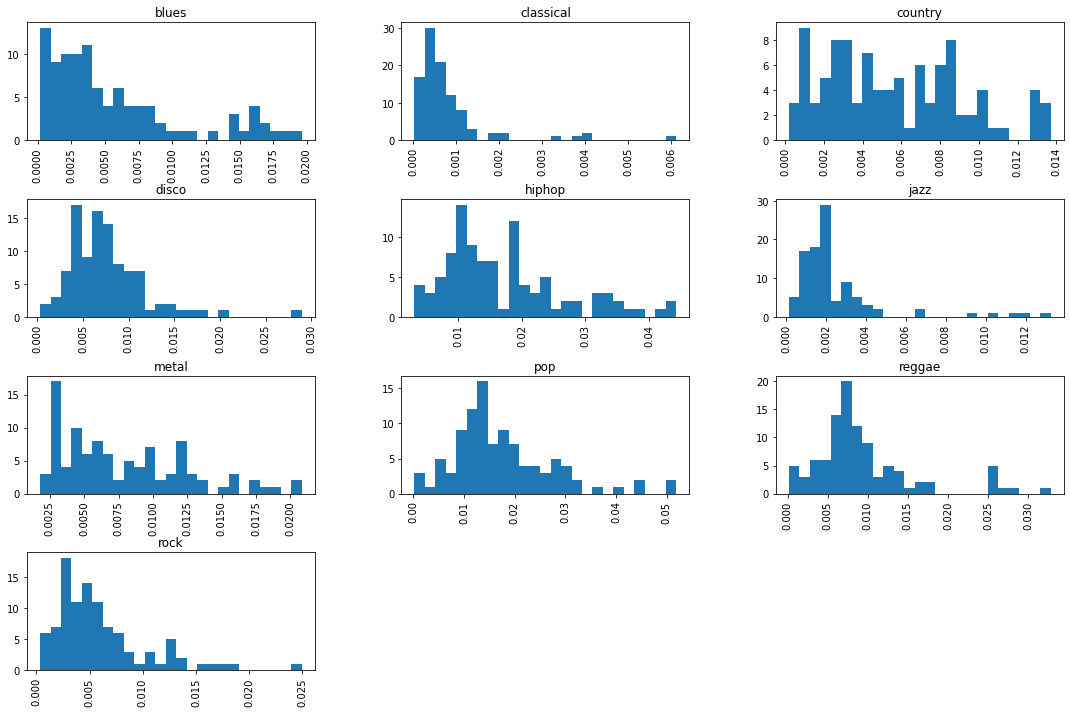

In [97]:
vizzFeatures=valuesFinalFeatures.copy(deep=True) #create a copy of dataframe for vizualisations
vizzFeatures['genre']=labelGenre.inverse_transform(list(valuesFinalFeatures['genre']))
vizzFeatures['Magnitude Spectrum Overall Standard Deviation_1'].hist(by=vizzFeatures['genre'],figsize=(18,12),bins=25)
plt.ylabel('Magnitude Spectrum Standard Deviation')
plt.savefig('hist.jpg',dpi=300)

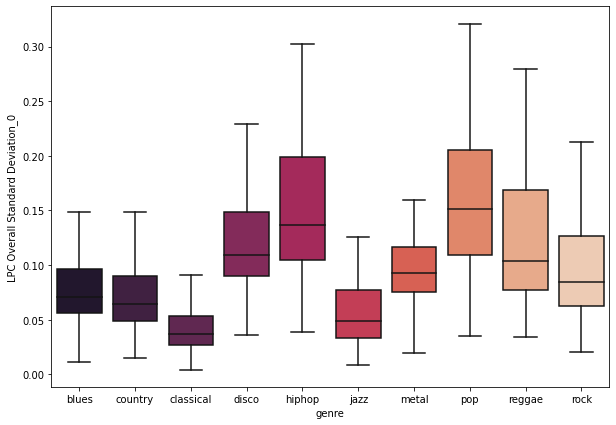

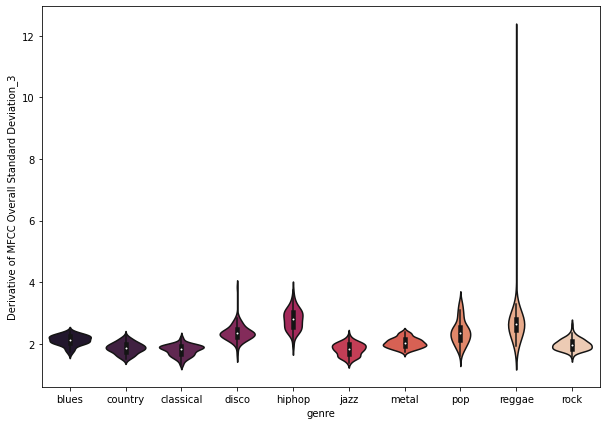

In [94]:
plt.figure(figsize=(10, 7))
sns.boxplot(x=vizzFeatures['genre'],y=vizzFeatures['LPC Overall Standard Deviation_0'],showfliers=False, palette="rocket")
plt.savefig('LPCBoxPlot.jpg',dpi=300)
plt.show()
plt.figure(figsize=(10, 7))
sns.violinplot(x=vizzFeatures['genre'],y=vizzFeatures['Derivative of MFCC Overall Standard Deviation_3'],showfliers=False, palette="rocket")
plt.savefig('DerivMFCCviolinPlot.jpg',dpi=300)


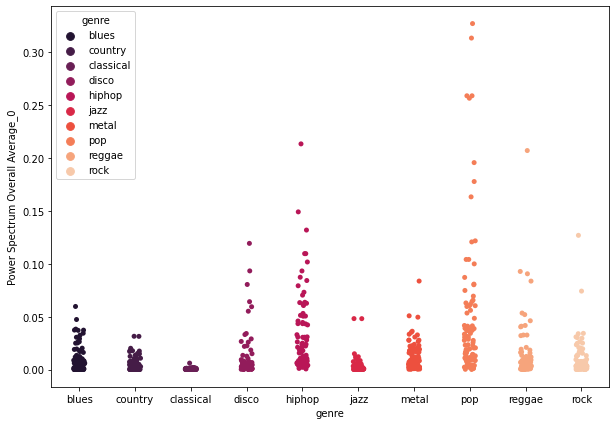

In [56]:
plt.figure(figsize=(10, 7))
sns.stripplot(x=vizzFeatures['genre'],y=vizzFeatures['Power Spectrum Overall Average_0'],hue=vizzFeatures['genre'], palette="rocket")
plt.savefig('PowerSpectrumOAStripPlot.jpg',dpi=300)
plt.show()

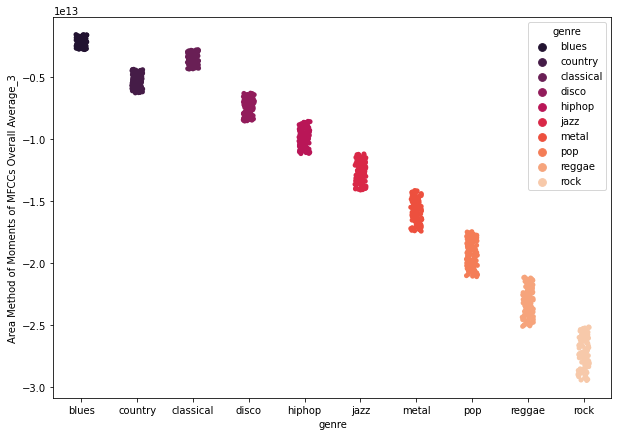

In [58]:
plt.figure(figsize=(10, 7))
sns.stripplot(x=vizzFeatures['genre'],y=vizzFeatures['Area Method of Moments of MFCCs Overall Average_3'],hue=vizzFeatures['genre'], palette="rocket")
plt.savefig('AreaMethodStripPlot.jpg',dpi=300)
plt.show()

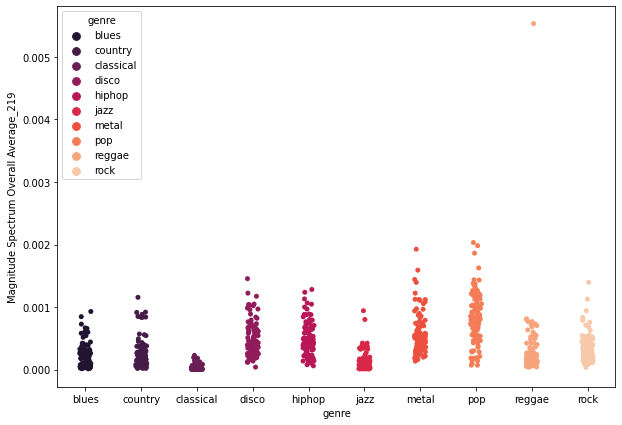

In [11]:
plt.figure(figsize=(10, 7))
sns.stripplot(x=vizzFeatures['genre'],y=vizzFeatures['Magnitude Spectrum Overall Average_219'],hue=vizzFeatures['genre'], palette="rocket")
plt.show()

In [12]:
valuesFinalFeatures = valuesFinalFeatures.sample(frac=1,random_state=1).reset_index(drop=True) #shuffleing the data frame so every row is random and not in order of input
valuesFinalFeatures = valuesFinalFeatures.dropna(axis='columns')

valuesFinalFeatures

,Magnitude Spectrum Overall Standard Deviation_0,Magnitude Spectrum Overall Standard Deviation_1,Magnitude Spectrum Overall Standard Deviation_2,Magnitude Spectrum Overall Standard Deviation_3,Magnitude Spectrum Overall Standard Deviation_4,Magnitude Spectrum Overall Standard Deviation_5,Magnitude Spectrum Overall Standard Deviation_6,Magnitude Spectrum Overall Standard Deviation_7,Magnitude Spectrum Overall Standard Deviation_8,Magnitude Spectrum Overall Standard Deviation_9,...,Area Method of Moments of MFCCs Overall Average_1,Area Method of Moments of MFCCs Overall Average_2,Area Method of Moments of MFCCs Overall Average_3,Area Method of Moments of MFCCs Overall Average_4,Area Method of Moments of MFCCs Overall Average_5,Area Method of Moments of MFCCs Overall Average_6,Area Method of Moments of MFCCs Overall Average_7,Area Method of Moments of MFCCs Overall Average_8,Area Method of Moments of MFCCs Overall Average_9,genre
0,0.000345,0.002083,0.005822,0.006762,0.006853,0.002697,0.001309,0.001207,0.001402,0.001382,...,3378000.0,71540.0,-1.141000e+13,-2.416000e+11,-5.116000e+09,7.706000e+19,2.179000e+12,4.616000e+10,7.319000e+14,5
1,0.005215,0.018360,0.025960,0.025680,0.017270,0.014370,0.011860,0.009198,0.010010,0.011140,...,3800000.0,77160.0,-1.444000e+13,-2.932000e+11,-5.952000e+09,1.097000e+20,2.643000e+12,5.367000e+10,9.185000e+14,6
2,0.001587,0.006730,0.013830,0.014610,0.012300,0.010880,0.007172,0.007622,0.006157,0.004101,...,3148000.0,75330.0,-9.908000e+12,-2.371000e+11,-5.673000e+09,6.237000e+19,2.138000e+12,5.116000e+10,8.545000e+14,4
3,0.000997,0.002250,0.009943,0.013590,0.009468,0.011490,0.010010,0.006231,0.006461,0.008013,...,2795000.0,80120.0,-7.814000e+12,-2.240000e+11,-6.417000e+09,4.368000e+19,2.019000e+12,5.786000e+10,1.028000e+15,3
4,0.000626,0.000680,0.000814,0.001632,0.003536,0.007918,0.006767,0.005841,0.006432,0.005638,...,1850000.0,53770.0,-3.422000e+12,-9.947000e+10,-2.890000e+09,1.266000e+19,8.971000e+11,2.608000e+10,3.107000e+14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.004953,0.017360,0.040310,0.046160,0.032930,0.017950,0.012490,0.013240,0.013490,0.012600,...,4465000.0,76090.0,-1.993000e+13,-3.397000e+11,-5.788000e+09,1.780000e+20,3.064000e+12,5.222000e+10,8.807000e+14,7
995,0.000421,0.002266,0.006631,0.007959,0.005513,0.005034,0.006778,0.006310,0.005855,0.008916,...,1557000.0,40350.0,-2.425000e+12,-6.284000e+10,-1.628000e+09,7.553000e+18,5.670000e+11,1.469000e+10,1.313000e+14,0
996,0.003813,0.013200,0.015630,0.015380,0.011640,0.008937,0.006761,0.005197,0.005561,0.009546,...,5054000.0,74040.0,-2.555000e+13,-3.742000e+11,-5.479000e+09,2.582000e+20,3.377000e+12,4.947000e+10,8.112000e+14,9
997,0.000507,0.000334,0.001397,0.003632,0.003349,0.003856,0.006063,0.006561,0.004907,0.004340,...,1821000.0,50230.0,-3.315000e+12,-9.144000e+10,-2.522000e+09,1.207000e+19,8.248000e+11,2.275000e+10,2.533000e+14,1


In [13]:
infomationGainArr=feature_selection.mutual_info_classif(valuesFinalFeatures.iloc[:,:-1],valuesFinalFeatures.iloc[:,-1])
infomationGainArr

array([0.35326289, 0.51910761, 0.49062209, ..., 2.09769113, 1.11916417,
       1.10431151])

In [14]:
featureset=list(valuesFinalFeatures.columns)
importances=dict(zip(featureset,infomationGainArr))
sortedImportances=dict(sorted(importances.items(),key=lambda item:item[1],reverse=True))
count=0
for val in sortedImportances.values():
    count+=1
print(f"this is how many features we have originally {count}. ")
# listSortedImportances=list(sortedImportances)

# uniqueSortedImportances=sortedImportances.keys()
uniqueSortedImportances=[i.split('_',1)[0] for i in list(sortedImportances.keys())]
f = open("InitialFeatureSetUnique.txt", "w")
for item in sorted(set(uniqueSortedImportances)):
   f.write(item + "\n")
f.close()

# plt.figure(figsize=(10, 50))
# listSortedImportances
# plt.barh(listSortedImportances[:20],listSortedImportances[:20],color='teal')

delete = [key for key in sortedImportances if sortedImportances[key] == 0]
for key in delete:
        del sortedImportances[key]

count=0
for val in sortedImportances.values():
    count+=1
# print(count)
print(f"This is how many features we have after removing the ones with 0 importance {count}. ")

this is how many features we have originally 2096. 
This is how many features we have after removing the ones with 0 importance 1824. 


In the above line we remove

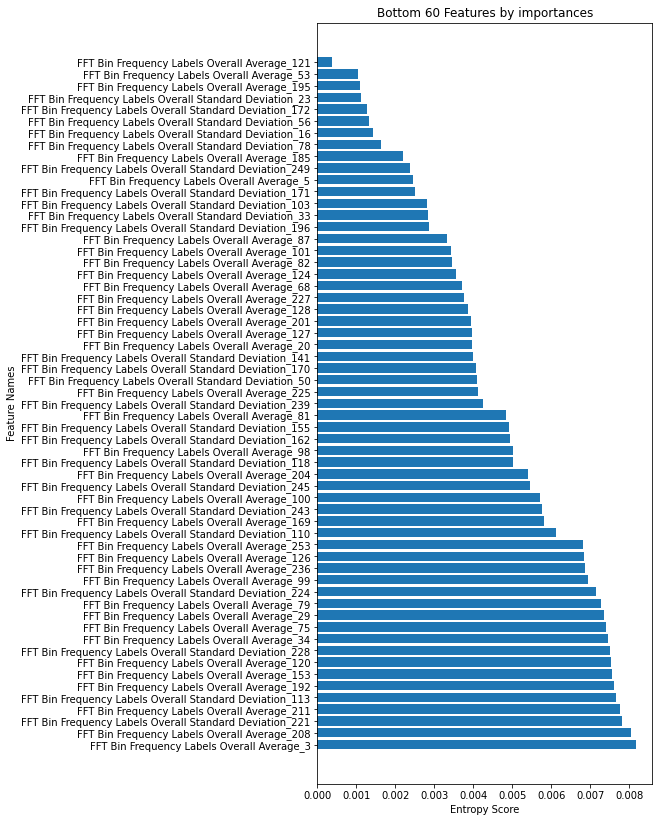

In [93]:
names = list(sortedImportances.keys())
values = list(sortedImportances.values())
plt.figure(figsize=(6,14))
plt.barh(range(len(sortedImportances))[-60:-1], values[-60:-1], tick_label=names[-60:-1])
plt.xlabel("Entropy Score")
plt.ylabel("Feature Names")
plt.title("Bottom 60 Features by importances")
plt.savefig('entropyScores_60.jpg',bbox_inches='tight',dpi=300)
plt.show()

In [16]:
sortedImportances

{'Area Method of Moments of MFCCs Overall Standard Deviation_6': 2.293880129697511,
 'Area Method of Moments Overall Average_7': 2.293563146047194,
 'Area Method of Moments of MFCCs Overall Average_3': 2.293246162396877,
 'Area Method of Moments of MFCCs Overall Average_1': 2.2931794289968104,
 'Area Method of Moments Overall Average_4': 2.29297922879661,
 'Area Method of Moments Overall Average_5': 2.292669395153443,
 'Area Method of Moments Overall Average_9': 2.292669395153443,
 'Area Method of Moments Overall Average_2': 2.29258597840336,
 'Area Method of Moments Overall Average_6': 2.292512094996143,
 'Area Method of Moments Overall Average_8': 2.292252311403026,
 'Area Method of Moments of MFCCs Overall Average_6': 2.2919782277956093,
 'Area Method of Moments Overall Average_3': 2.2918447609954757,
 'Area Method of Moments of MFCCs Overall Standard Deviation_3': 2.291561144045192,
 'Area Method of Moments Overall Average_1': 2.2878266805885064,
 'Area Method of Moments Overall St

In [17]:
# uniqueSortedImportances=sortedImportances.keys()
uniqueSortedImportances=[i.split('_',1)[0] for i in list(sortedImportances.keys())]

f = open("finalFeatureSetUnique.txt", "w")
for item in sorted(set(uniqueSortedImportances)):
   f.write(item + "\n")
f.close()

In [18]:
valuesFinalFeatures = valuesFinalFeatures.dropna(axis='columns')

finalFeaturesList=list(sortedImportances.keys())

f = open("finalFeatureSet.txt", "w")
for item in sorted(finalFeaturesList):
   f.write(item + "\n")
f.close()

finalFeaturesList.append('genre')
valuesFinalFeatures = valuesFinalFeatures[finalFeaturesList]
# valuesFinalFeatures['genre']=labelGenre.fit_transform(list(finalFeatures['genre']))


print(valuesFinalFeatures.shape)
X_train,X_test,y_train,y_test = train_test_split(valuesFinalFeatures.iloc[:,:-1],valuesFinalFeatures.iloc[:,-1],test_size=0.25)

numFeatures=len(X_train.columns)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True).fit(X_train)
X_train = scaler.transform(X_train)
# X_train_original=np.copy(X_train)
X_test = scaler.transform(X_test)
# X_test_original=np.copy(X_test)

(999, 1825)


### Attempting Recursive feature elimination

In [72]:
# from sklearn.feature_selection import RFECV
# from sklearn.model_selection import StratifiedKFold
# # ranFor = RandomForestClassifier(max_depth=100, random_state=42,n_estimators=250)
# # The "accuracy" scoring shows the proportion of correct classifications
# ranFor = RandomForestClassifier(max_depth=200, random_state=42,n_estimators=50)


# min_features_to_select = 10  # Minimum number of features to consider
# rfecv = RFECV(
#     estimator=ranFor,
#     step=1,
#     cv=StratifiedKFold(2),
#     scoring="accuracy",
#     n_jobs=-1,
#     verbose=1,
#     min_features_to_select=min_features_to_select,
#     importance_getter='auto'
# )
# rfecv.fit(X_train, y_tracdvdvdvcccccccccc

# print("Optimal number of features : %d" % rfecv.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure(figsize=(40,10))
# plt.44415xxsxsxxlabel("Number of features selected")
# plt.ylabel("Cross validation score (accuracy)")
# plt.plot(
#     range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
#     rfecv.grid_scores_,
# )
# plt.show()

# rfecv.transform(X_train)
# rfecv.transform(X_test)
# print(f'Features remaining : {len(X_train)}')
# print(rfecv.get_feature_names_out())

In [73]:
# Compute ROC curve and ROC area for each class
from numpy import inf
from sklearn.metrics import precision_recall_fscore_support
 

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    if hasattr(clf,'decision_function'):
        y_score = clf.decision_function(X_test)
    elif hasattr(clf,'predict_proba'):
        y_score = clf.predict_proba(X_test)
    elif hasattr(clf,'predict_log_proba'):
        y_score = clf.predict_log_proba(X_test)
    y_score[y_score==-inf]=0


    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.1, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic for {} model'.format(type(clf).__name__))
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.3f) for label %s' % (roc_auc[i], labelGenre.inverse_transform([i])))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.savefig("{}_ROC.jpg".format(type(clf).__name__),dpi=300)
    plt.show()

Build finished in 2.2539 seconds
0.7035675675675674


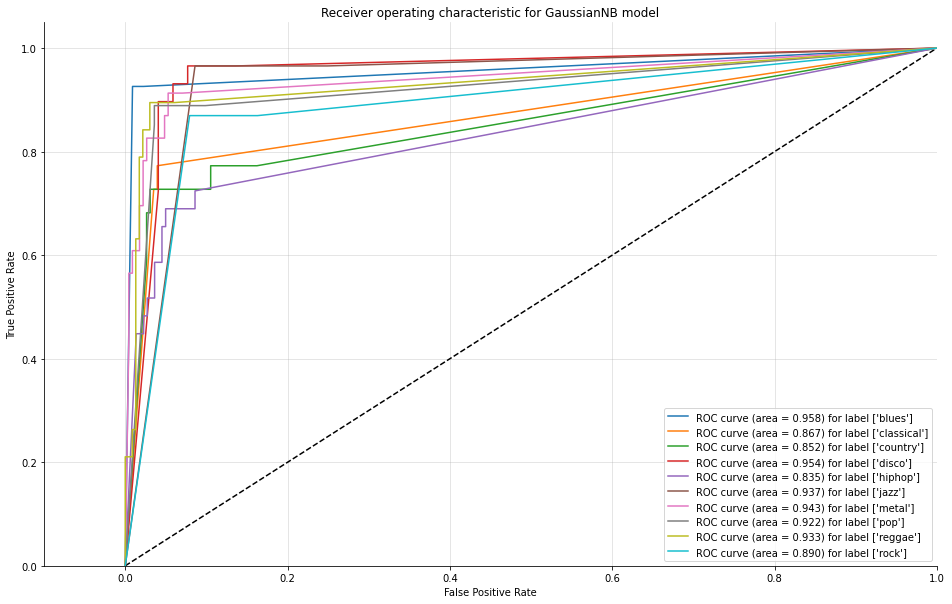

Validation accuracy: 70.0
Results:
Precision: 75.67232%
Recall: 68.26726%
F1 Score: 67.19347%
 


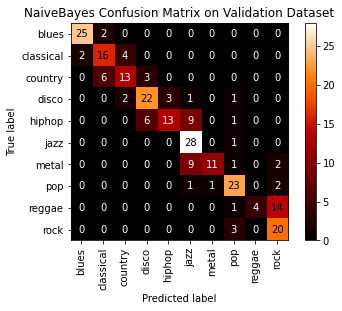

In [74]:
import time					
tic = time.perf_counter() # Start Time
gnb = GaussianNB().fit(X_train, y_train)
scores = cross_val_score(gnb, X_train, y_train, cv=10)

toc = time.perf_counter()
print(f"Build finished in {toc - tic:0.4f} seconds")

# gnb_predictions = gnb.predict(X_test)
print(scores.mean())
plot_multiclass_roc(gnb, X_test, y_test, n_classes=10, figsize=(16, 10))

y_pred = gnb.predict(X_test)
val_accuracy = gnb.score(X_test, y_test)
print(f"Validation accuracy: {val_accuracy*100}")
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm,display_labels=labelGenre.inverse_transform(gnb.classes_)).plot(cmap='gist_heat',xticks_rotation='vertical')# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
plt.title("NaiveBayes Confusion Matrix on Validation Dataset")
plt.savefig("NB_confusion.jpg",bbox_inches='tight',dpi=300)

print(f"Results:\nPrecision: {round(precision_recall_fscore_support(y_test,y_pred,average='macro')[0]*100,5)}%\nRecall: {round(precision_recall_fscore_support(y_test,y_pred,average='macro')[1]*100,5)}%\nF1 Score: {round(precision_recall_fscore_support(y_test,y_pred,average='macro')[2]*100,5)}%\n ")

Build finished in 7.8994 seconds
0.8236576576576576


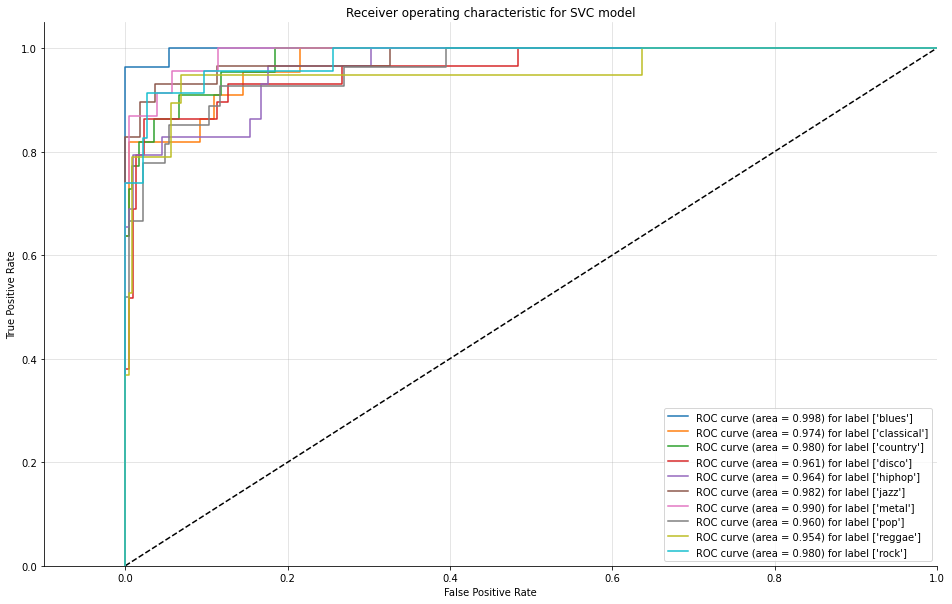

Validation accuracy: 84.0
Results:
Precision: 84.66651%
Recall: 83.70476%
F1 Score: 83.9767%
 


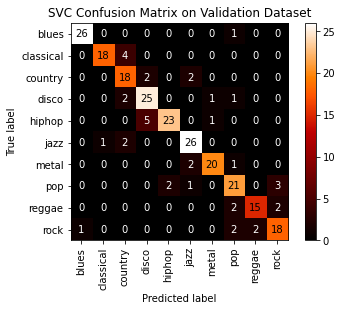

In [75]:

tic = time.perf_counter() # Start Time
svm_model = SVC(kernel = 'rbf', C = 1).fit(X_train, y_train) #rbf or Radial Basis funciton is a version of teh gaussian kernal
scores = cross_val_score(svm_model, X_train, y_train, cv=10)
toc = time.perf_counter()
print(f"Build finished in {toc - tic:0.4f} seconds")
svm_predictions = svm_model.predict(X_test)

# svm_predictions=np.transpose([pred[:, 1] for pred in svm_predictions])
print(scores.mean())

plot_multiclass_roc(svm_model, X_test, y_test, n_classes=10, figsize=(16, 10))

y_pred = svm_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
val_accuracy = svm_model.score(X_test, y_test)
print(f"Validation accuracy: {val_accuracy*100}")

cm_display = ConfusionMatrixDisplay(cm,display_labels=labelGenre.inverse_transform(svm_model.classes_)).plot(cmap='gist_heat',xticks_rotation='vertical')
plt.title("SVC Confusion Matrix on Validation Dataset")
plt.savefig("SVC_confusion.jpg",bbox_inches='tight',dpi=300)

print(f"Results:\nPrecision: {round(precision_recall_fscore_support(y_test,y_pred,average='macro')[0]*100,5)}%\nRecall: {round(precision_recall_fscore_support(y_test,y_pred,average='macro')[1]*100,5)}%\nF1 Score: {round(precision_recall_fscore_support(y_test,y_pred,average='macro')[2]*100,5)}%\n ")

Build finished in 0.5716 seconds
0.6955135135135135


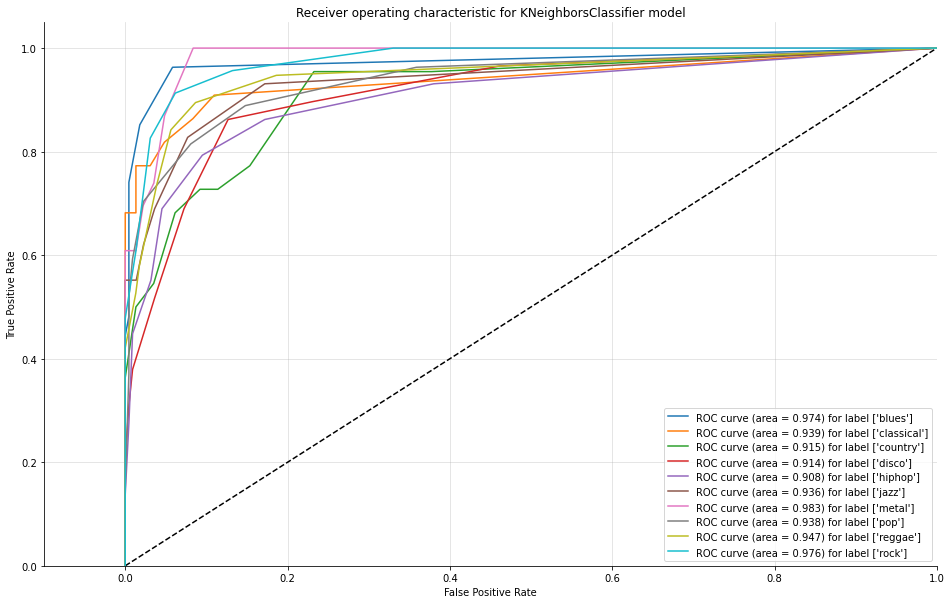

Validation accuracy: 67.2
Results:
Precision: 70.64314%
Recall: 67.87844%
F1 Score: 67.82496%
 


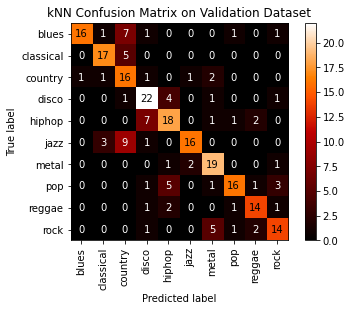

In [76]:

tic = time.perf_counter() # Start Time
neigh = KNeighborsClassifier(n_neighbors=11).fit(X_train, y_train)
scores = cross_val_score(neigh, X_train, y_train, cv=10)
toc = time.perf_counter()

print(f"Build finished in {toc - tic:0.4f} seconds")
print(scores.mean())
plot_multiclass_roc(neigh, X_test, y_test, n_classes=10, figsize=(16, 10))

y_pred = neigh.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
val_accuracy = neigh.score(X_test, y_test)
print(f"Validation accuracy: {val_accuracy*100}")

cm_display = ConfusionMatrixDisplay(cm,display_labels=labelGenre.inverse_transform(neigh.classes_)).plot(cmap='gist_heat',xticks_rotation='vertical')
plt.title("kNN Confusion Matrix on Validation Dataset")
plt.savefig("kNN_confusion.jpg",bbox_inches='tight',dpi=300)
print(f"Results:\nPrecision: {round(precision_recall_fscore_support(y_test,y_pred,average='macro')[0]*100,5)}%\nRecall: {round(precision_recall_fscore_support(y_test,y_pred,average='macro')[1]*100,5)}%\nF1 Score: {round(precision_recall_fscore_support(y_test,y_pred,average='macro')[2]*100,5)}%\n ")

Build finished in 13.2887 seconds
0.984


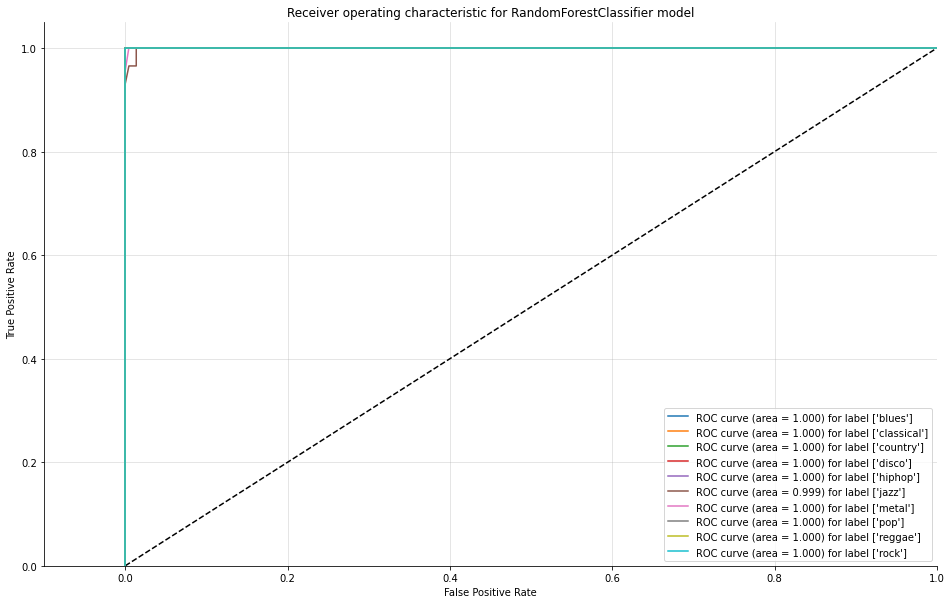

Validation accuracy: 98.4
Results:
Precision: 98.45227%
Recall: 98.42102%
F1 Score: 98.42068%
 


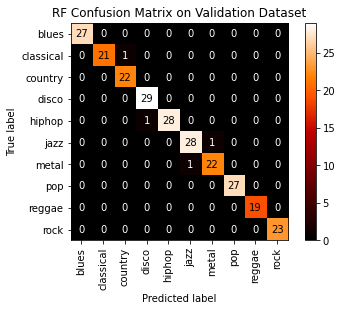

In [77]:
tic = time.perf_counter() # Start Time
ranFor = RandomForestClassifier(max_depth=200, random_state=42,n_estimators=50).fit(X_train, y_train)
scores = cross_val_score(ranFor, X_train, y_train, cv=10)
toc = time.perf_counter()

# ranFor.fit(X_train, y_train)
print(f"Build finished in {toc - tic:0.4f} seconds")
print(scores.mean())
plot_multiclass_roc(ranFor, X_test, y_test, n_classes=10, figsize=(16, 10))

y_pred = ranFor.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
val_accuracy = ranFor.score(X_test, y_test)
print(f"Validation accuracy: {val_accuracy*100}")

cm_display = ConfusionMatrixDisplay(cm,display_labels=labelGenre.inverse_transform(ranFor.classes_)).plot(cmap='gist_heat',xticks_rotation='vertical')
plt.title("RF Confusion Matrix on Validation Dataset")
plt.savefig("RF_confusion.jpg",bbox_inches='tight',dpi=300)
print(f"Results:\nPrecision: {round(precision_recall_fscore_support(y_test,y_pred,average='macro')[0]*100,5)}%\nRecall: {round(precision_recall_fscore_support(y_test,y_pred,average='macro')[1]*100,5)}%\nF1 Score: {round(precision_recall_fscore_support(y_test,y_pred,average='macro')[2]*100,5)}%\n ")

Build finished in 77.9690 seconds
0.9185225225225224


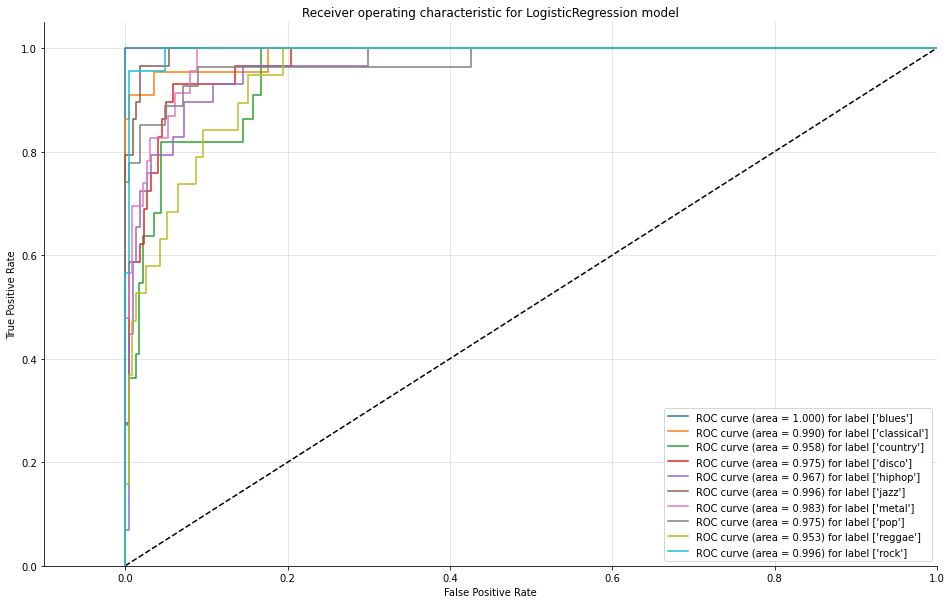

Validation accuracy: 91.2
Results:
Precision: 91.29969%
Recall: 90.77299%
F1 Score: 90.95621%
 


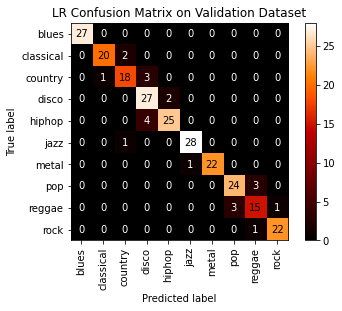

In [78]:
tic = time.perf_counter() # Start Time

logisticRe = LogisticRegression(random_state=0,max_iter=500).fit(X_train, y_train)
scores = cross_val_score(logisticRe, X_train, y_train, cv=10)

toc = time.perf_counter()
print(f"Build finished in {toc - tic:0.4f} seconds")

print(scores.mean())
plot_multiclass_roc(logisticRe, X_test, y_test, n_classes=10, figsize=(16, 10))

y_pred = logisticRe.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
val_accuracy = logisticRe.score(X_test, y_test)
print(f"Validation accuracy: {val_accuracy*100}")

cm_display = ConfusionMatrixDisplay(cm,display_labels=labelGenre.inverse_transform(logisticRe.classes_)).plot(cmap='gist_heat',xticks_rotation='vertical')
plt.title("LR Confusion Matrix on Validation Dataset")
plt.savefig("LR_confusion.jpg",bbox_inches='tight',dpi=300)

print(f"Results:\nPrecision: {round(precision_recall_fscore_support(y_test,y_pred,average='macro')[0]*100,5)}%\nRecall: {round(precision_recall_fscore_support(y_test,y_pred,average='macro')[1]*100,5)}%\nF1 Score: {round(precision_recall_fscore_support(y_test,y_pred,average='macro')[2]*100,5)}%\n ")

In [79]:

def preprocess(x, y):
  x = tf.cast(x, tf.float64)
  y = tf.cast(y, tf.int32)

  return x, y

def create_dataset(xs, ys, n_classes=10):
  ys = tf.one_hot(ys, depth=n_classes)
  return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .map(preprocess) \
    .shuffle(len(ys)) \
    .batch(66)
train_dataset = create_dataset(X_train, y_train)
test_dataset = create_dataset(X_test, y_test)

model = keras.Sequential([
    keras.layers.Reshape(target_shape=(numFeatures,), input_shape=(numFeatures,1)),
    keras.layers.Dense(units=500, activation='relu'),
    keras.layers.Dense(units=50, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer='Adam', 
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
tic = time.perf_counter() # Start Time
history = model.fit(
    train_dataset.repeat(), 
    epochs=50, 
    steps_per_epoch=50,
    validation_data=test_dataset.repeat(), 
    use_multiprocessing=True,
    validation_steps=10
)
toc = time.perf_counter()
print(f"Build finished in {toc - tic:0.4f} seconds")

Epoch 1/50
50/50 [==============================] - 2s 26ms/step - loss: 0.7929 - accuracy: 0.7609 - val_loss: 0.4623 - val_accuracy: 0.8813
Epoch 2/50
50/50 [==============================] - 1s 18ms/step - loss: 0.1006 - accuracy: 0.9795 - val_loss: 0.4326 - val_accuracy: 0.8655
Epoch 3/50
50/50 [==============================] - 1s 17ms/step - loss: 0.0218 - accuracy: 0.9978 - val_loss: 0.3657 - val_accuracy: 0.8813
Epoch 4/50
50/50 [==============================] - 1s 17ms/step - loss: 0.0141 - accuracy: 0.9984 - val_loss: 0.3992 - val_accuracy: 0.8782
Epoch 5/50
50/50 [==============================] - 1s 17ms/step - loss: 0.0085 - accuracy: 0.9984 - val_loss: 0.3608 - val_accuracy: 0.9019
Epoch 6/50
50/50 [==============================] - 1s 16ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3310 - val_accuracy: 0.9114
Epoch 7/50
50/50 [==============================] - 1s 17ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3358 - val_accuracy: 0.9146
Epoch 8/50
50

In [80]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred
  def score(self,X,y):
    y_pred=np.array(self.predict(X))
    y=np.array(y)
    return np.sum(y==y_pred)/len(y)

classifier = estimator(model, labelGenre.classes_)

8/8 [==============================] - 0s 6ms/step
Validation accuracy: 91.2
Results:
Precision: 92.00283%
Recall: 91.72831%
F1 Score: 91.78532%
 


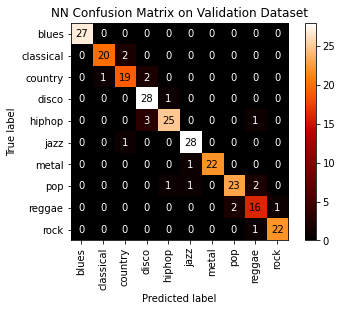

In [81]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
val_accuracy = logisticRe.score(X_test, y_test)
print(f"Validation accuracy: {val_accuracy*100}")

cm_display = ConfusionMatrixDisplay(cm,display_labels=labelGenre.inverse_transform(logisticRe.classes_)).plot(cmap='gist_heat',xticks_rotation='vertical')
plt.title("NN Confusion Matrix on Validation Dataset")
plt.savefig("NN_confusion.jpg",bbox_inches='tight',dpi=300)
print(f"Results:\nPrecision: {round(precision_recall_fscore_support(y_test,y_pred,average='macro')[0]*100,5)}%\nRecall: {round(precision_recall_fscore_support(y_test,y_pred,average='macro')[1]*100,5)}%\nF1 Score: {round(precision_recall_fscore_support(y_test,y_pred,average='macro')[2]*100,5)}%\n ")

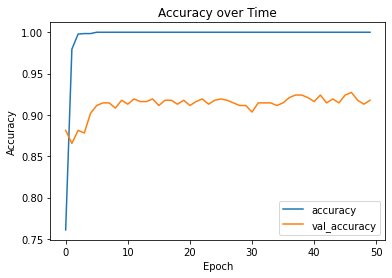

In [85]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5,1.1])
plt.legend(loc='lower right')
plt.title("Accuracy over Time")
plt.savefig("nnAccuracy.jpg",dpi=300)

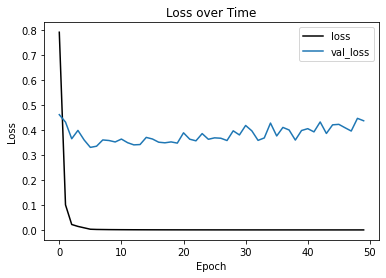

In [86]:
plt.plot(history.history['loss'],label='loss',c='black')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0.5,1])
plt.legend(loc='upper right')
plt.title("Loss over Time")
plt.savefig("nnLoss.jpg",dpi=300)